In [2]:
'''
1. Read Sec>on 3.8 of Textbook 2 (by John Hull) for background of the project. 
2. Clean the data set (IA_House_Price_Original_Data.xlsx) 
3. Put 1800 in the training set, 600 in the validation set and the rest in the test set
4. Choose the 47 features used in Sec>on 4.3 and list all of them.
5. Derive the linear regression model to minimize the mean square error. 
6. Use Ridge Regression to derive the parameters for � = 0.10, 0.30, 0.60.
7. Use Lasso Regression to derive the parameters for � = 0.02, 0.06, 0.10.
8. Use the valida>on set to pick the best model (specify the values of parameters and the 
regulariza>on method and the value of �).
9. Evaluate your model performance with the test data set.
10. (op>onal) Go to Zillow.com and find a house on sale in Iowa and use your model to 
predict the price. Compare your price with the listed price and the Zillow es>mated 
price.
'''

'''
Beforehand:
I cleaned the data in excel:
(1)calculated the bathroom number, halfbathroom number, Finished basement(by adding up some columns)
(2)replace bathroom quality by 1,2,3,4,5
(3)deleted features other than the 47 chosen ones
'''



import pandas as pd
data=pd.read_excel('Cleaned_data.xlsx')
print(data)

      LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtQual  \
0        8450            7            5       2003          2003       4.0   
1        9600            6            8       1976          1976       4.0   
2       11250            7            5       2001          2002       4.0   
3        9550            7            5       1915          1970       3.0   
4       14260            8            5       2000          2000       4.0   
...       ...          ...          ...        ...           ...       ...   
2903     1936            4            7       1970          1970       3.0   
2904     1894            4            5       1970          1970       3.0   
2905    20000            5            7       1960          1996       3.0   
2906    10441            5            5       1992          1992       4.0   
2907     9627            7            5       1993          1994       4.0   

      Finished basement  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ... 

      LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtQual  \
0        8450            7            5       2003          2003       4.0   
1        9600            6            8       1976          1976       4.0   
2       11250            7            5       2001          2002       4.0   
3        9550            7            5       1915          1970       3.0   
4       14260            8            5       2000          2000       4.0   
...       ...          ...          ...        ...           ...       ...   
2903     1936            4            7       1970          1970       3.0   
2904     1894            4            5       1970          1970       3.0   
2905    20000            5            7       1960          1996       3.0   
2906    10441            5            5       1992          1992       4.0   
2907     9627            7            5       1993          1994       4.0   

      Finished basement  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ... 

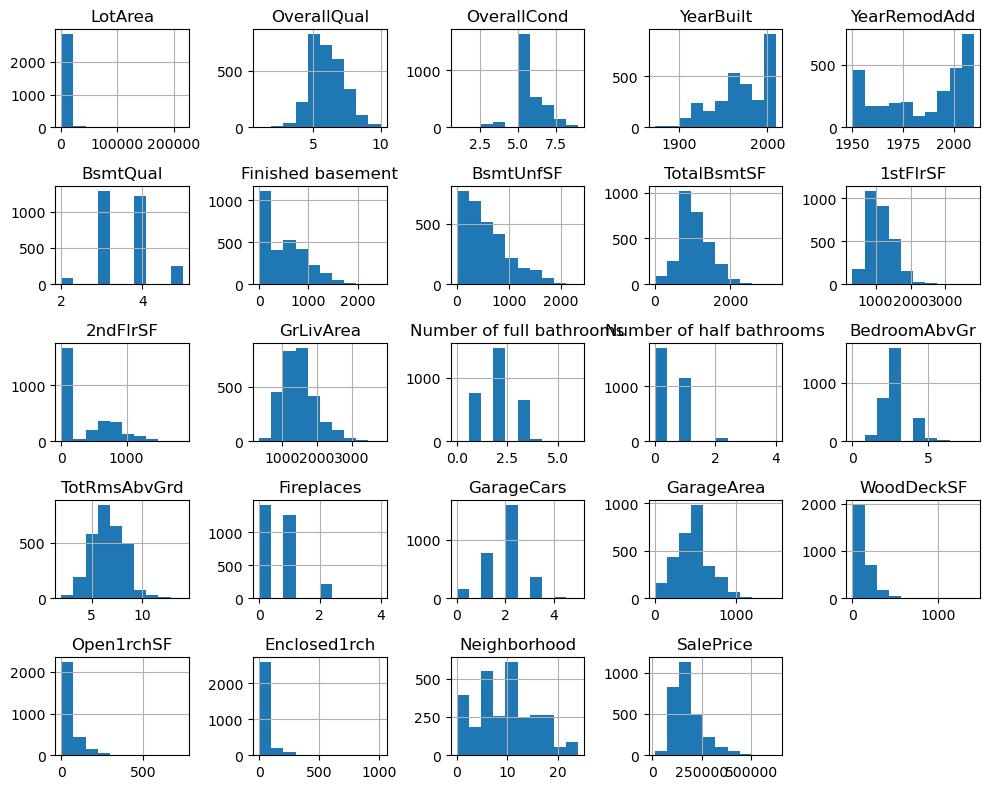

In [3]:
import matplotlib.pyplot as plt
Data2_hist=pd.read_excel('Cleaned_data.xlsx')
Data2_hist['Neighborhood'] = pd.factorize(Data2_hist['Neighborhood'])[0]
print(Data2_hist)

Data2_hist.hist(bins=10, figsize=(10, 8))  # You can adjust the 'bins' and 'figsize' as needed
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [22]:
##continue to clean data, replace nan, normalize

data['BsmtQual'].replace("NA", data['BsmtQual'].mean(), inplace=True)
data['BsmtQual'].describe()
df_with_dummies = pd.get_dummies(data, columns=['Neighborhood'])
#print(df_with_dummies)

for feature in df_with_dummies:

    #print(feature)
    mean_value=df_with_dummies[feature].mean()
    #print(mean_value)
    df_with_dummies[feature].fillna(mean_value, inplace=True)

#print(df_with_dummies)

df_normalized = (df_with_dummies - df_with_dummies.mean()) / df_with_dummies.std()
print(df_normalized)

       LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtQual  \
0    -0.214284     0.655977    -0.509958   1.047282      0.897565  0.620552   
1    -0.066743    -0.060082     2.189602   0.155386     -0.395237  0.620552   
2     0.144945     0.655977    -0.509958   0.981216      0.849683  0.620552   
3    -0.073158     0.655977    -0.509958  -1.859640     -0.682526 -0.835121   
4     0.531116     1.372037    -0.509958   0.948183      0.753920  0.620552   
...        ...          ...          ...        ...           ...       ...   
2903 -1.050005    -1.492201     1.289749  -0.042814     -0.682526 -0.835121   
2904 -1.055393    -1.492201    -0.509958  -0.042814     -0.682526 -0.835121   
2905  1.267536    -0.776142     1.289749  -0.373146      0.562394 -0.835121   
2906  0.041154    -0.776142    -0.509958   0.683917      0.370868  0.620552   
2907 -0.063279     0.655977    -0.509958   0.716950      0.466631  0.620552   

      Finished basement  BsmtUnfSF  TotalBsmtSF  1s

In [25]:
#split the sets
from sklearn.model_selection import train_test_split
# Assume df is your DataFrame and 'target' is the name of the column you're predicting.
X = df_normalized.drop(columns=['SalePrice'])  # Features
y = df_normalized['SalePrice']  # Target variable

# First, split into training+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=(2908-2400)/2908, random_state=42)

# Then split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=1/4, random_state=42) 

print(X_train, X_val, X_test)


       LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtQual  \
180  -1.026783    -0.060082    -0.509958   0.948183      0.753920  0.620552   
2517 -0.146030    -0.776142    -0.509958   0.188419     -0.347355  0.620552   
2819 -0.337705     0.655977    -0.509958   1.113349      0.993328  0.620552   
1541 -0.528609    -0.060082     0.389895  -1.033810     -1.640157 -0.835121   
293   0.838899     0.655977     1.289749   0.188419      0.466631 -0.835121   
...        ...          ...          ...        ...           ...       ...   
2125  0.025630    -0.776142     0.389895  -1.859640     -0.299474 -0.835121   
692  -0.513214    -0.776142     0.389895  -1.165943     -1.640157 -0.835121   
2672  0.014853     1.372037    -0.509958   0.749983      0.514512  0.620552   
848  -0.729393    -0.060082    -0.509958   1.047282      0.897565  0.620552   
737  -0.103564     0.655977    -0.509958   1.080316      0.945446  0.620552   

      Finished basement  BsmtUnfSF  TotalBsmtSF  1s

In [27]:
##list all the features:
print(df_dummies.describe())

             LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count    2908.000000  2908.000000  2908.000000  2908.000000   2908.000000   
mean    10120.229711     6.083906     5.566713  1971.296080   1984.254470   
std      7794.469991     1.396532     1.111292    30.272561     20.884877   
min      1300.000000     1.000000     1.000000  1872.000000   1950.000000   
25%      7466.500000     5.000000     5.000000  1954.000000   1965.000000   
50%      9444.500000     6.000000     5.000000  1973.000000   1993.000000   
75%     11521.500000     7.000000     6.000000  2001.000000   2004.000000   
max    215245.000000    10.000000     9.000000  2010.000000   2010.000000   

          BsmtQual  Finished basement    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  2908.000000        2908.000000  2908.000000  2908.000000  2908.000000   
mean      3.573701         486.411279   560.858322  1047.269601  1154.885144   
std       0.686967         459.877980   439.823652   419.916367   

coef of linear regression: [ 9.81524539e-02  2.31305538e-01  7.63580334e-02  1.01288633e-01
  4.15565959e-02  1.08688440e-01 -8.23825733e+10 -7.87900396e+10
  7.52238472e+10  1.16935569e-01  1.29890438e-01  1.75390874e-01
 -2.80927438e-02 -1.36326155e-03 -5.29435571e-02  3.22115422e-02
  2.88622939e-02  2.16391400e-02  6.76225418e-02  1.75145275e-02
  1.10340096e-02  8.70586192e-04  1.91729226e+10  1.14937633e+10
  1.98389682e+10  3.69625141e+10  2.39676749e+10  5.66960616e+10
  3.61207683e+10  4.86378717e+10  4.54221760e+10  3.40020271e+10
  2.20054634e+10  3.81047123e+10  7.05542833e+10  1.73920144e+10
  4.07227078e+10  2.98827321e+10  4.54221760e+10  5.39245212e+10
  2.50159324e+10  4.35632143e+10  3.98221469e+10  4.75566966e+10
  2.57723053e+10  3.05093125e+10  1.77629997e+10]
intercept of linear regression : -0.006099002670752508
MSE of linear regression: 0.1079827972142191


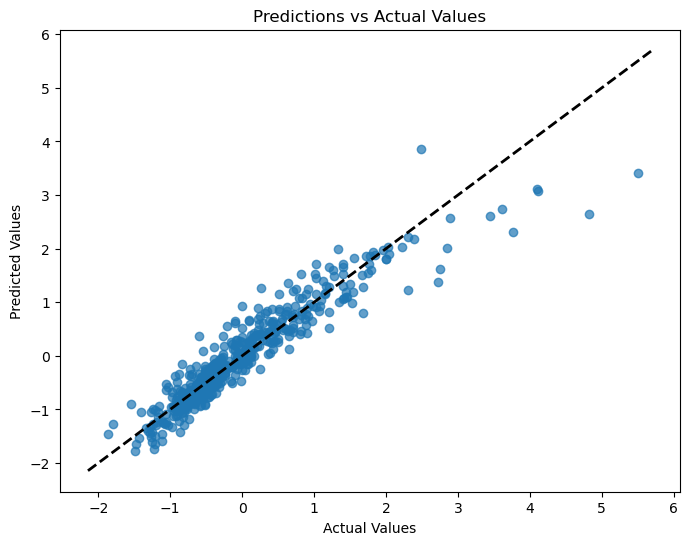

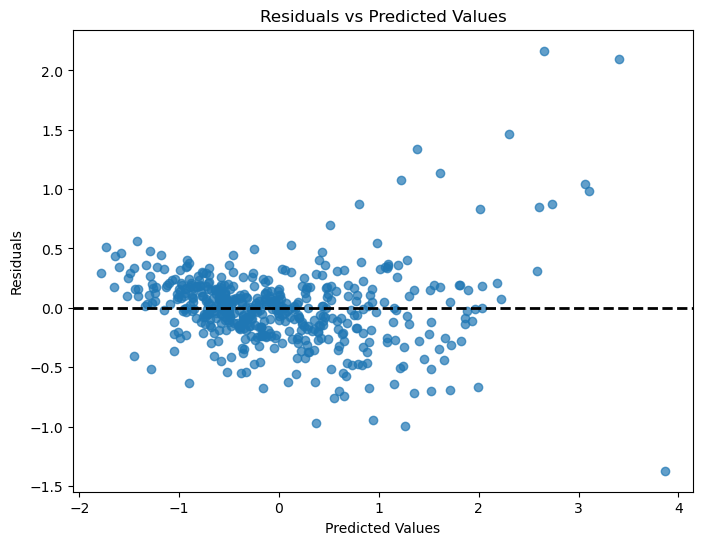

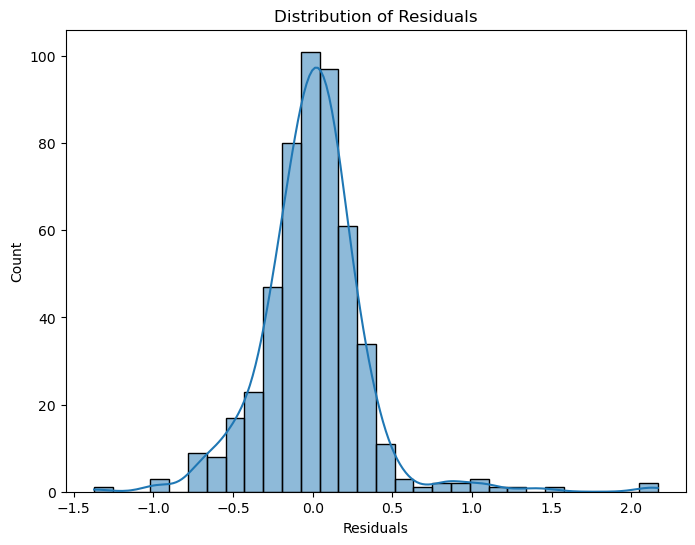

In [39]:
##Linear regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
z=model.fit(X_train, y_train)
y_pred = z.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("coef of linear regression:",z.coef_)
print("intercept of linear regression :",z.intercept_)
print("MSE of linear regression:" ,mse)



###visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()
import seaborn as sns

# Distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

MSE of ridge with 0.1 alpha: 0.1162450971334723
MSE of ridge with 0.3 alpha: 0.11624764118816566
MSE of ridge with 0.6 alpha: 0.11625145666328691
coef of ridge: [ 0.09817629  0.23144117  0.07624871  0.10131014  0.04156964  0.10861918
  0.12297353 -0.01160642  0.12251974  0.11679758  0.12959526  0.1755461
 -0.0281333  -0.00135862 -0.05288522  0.0322534   0.02885087  0.02165066
  0.06761149  0.01755134  0.01104027  0.00083987 -0.01341575 -0.01949682
 -0.01190337  0.02079513 -0.01845242 -0.01022469  0.0362378  -0.00317382
 -0.01016413  0.00144985 -0.016801   -0.03098417 -0.02171968 -0.02466829
 -0.0466896   0.05570969  0.08776848 -0.0180377  -0.00542919 -0.01391477
 -0.02712199  0.02464964  0.06759608  0.00560833 -0.01691259]
intercept of ridge: -0.00610592590324618
MSE of ridge with 0.1 alpha: 0.10799908093490128


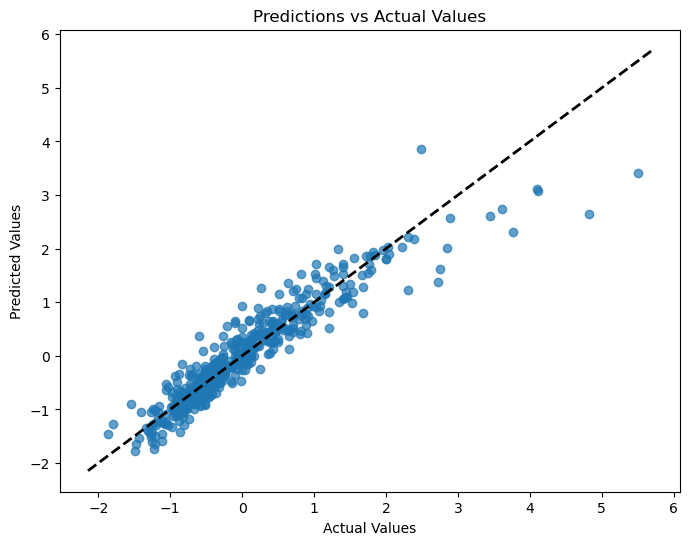

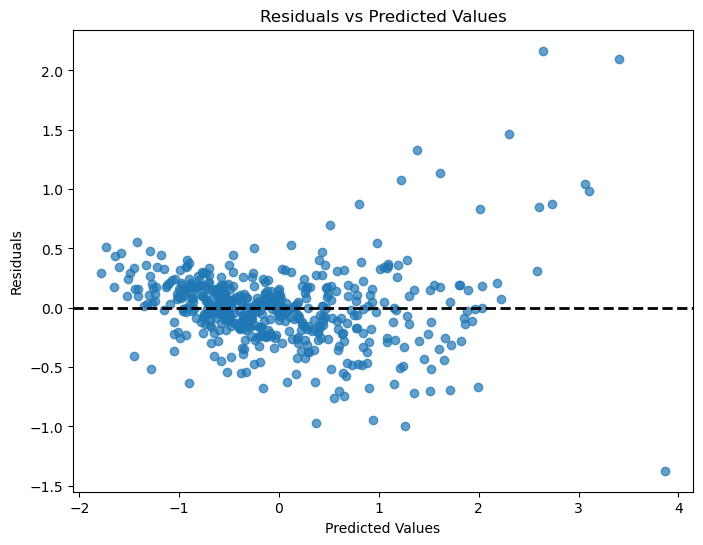

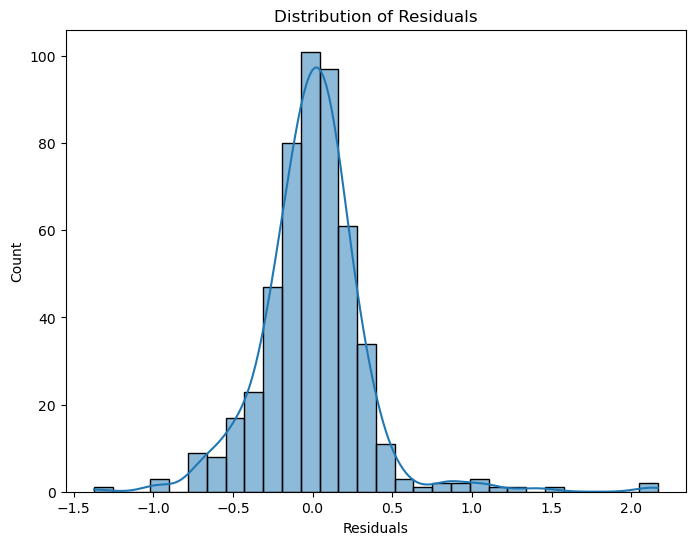

In [44]:
##Ridge

from sklearn.linear_model import Ridge


model1 = Ridge(alpha=0.1)
z=model1.fit(X_train, y_train)
y_pred = z.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print("MSE of ridge with 0.1 alpha:" ,mse)

model2 = Ridge(alpha=0.3)
z=model2.fit(X_train, y_train)
y_pred = z.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print("MSE of ridge with 0.3 alpha:" ,mse)

model3 = Ridge(alpha=0.6)
z=model3.fit(X_train, y_train)
y_pred = z.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print("MSE of ridge with 0.6 alpha:" ,mse)


###0.1 alpha produces the best result, so use alpha=0.1 to predict test set
model1 = Ridge(alpha=0.1)
z=model1.fit(X_train, y_train)
y_pred = z.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("coef of ridge:",z.coef_)
print("intercept of ridge:",z.intercept_)
print("MSE of ridge with 0.1 alpha:" ,mse)

###visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()
import seaborn as sns

# Distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

MSE of lasso with 0.02 alpha: 0.1303391502170269
MSE of lasso with 0.06 alpha: 0.15892998547485154
MSE of lasso with 0.1 alpha: 0.1911835669926022
coef of lasso: [ 0.07920376  0.27574405  0.03100883  0.03523137  0.05549255  0.12381382
  0.11617014 -0.          0.10288906  0.00943109  0.          0.28842289
  0.          0.         -0.00303029  0.          0.02618468  0.00635298
  0.08536887  0.00646783  0.         -0.         -0.         -0.
 -0.          0.00366352 -0.          0.          0.02663757  0.
  0.         -0.         -0.         -0.         -0.         -0.00428478
 -0.01324876  0.04624254  0.07825906 -0.00118573 -0.         -0.
 -0.0006704   0.01110805  0.05632189  0.         -0.        ]
intercept of lasso: -0.005874798411796861
MSE of lasso with 0.02 alpha: 0.11621916064953694


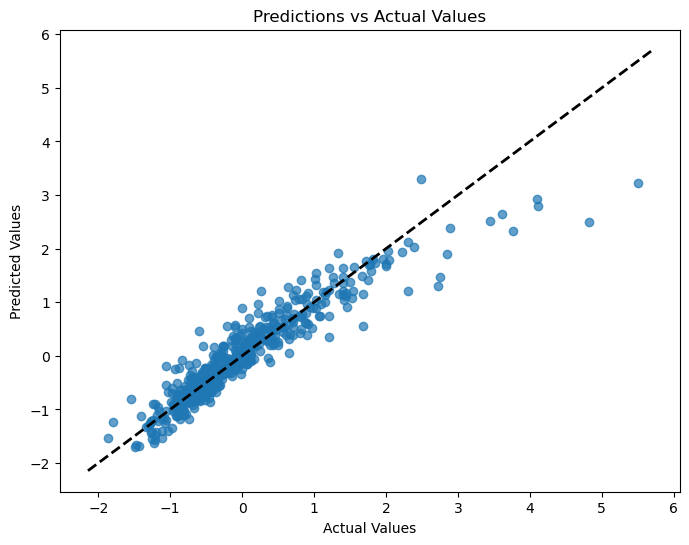

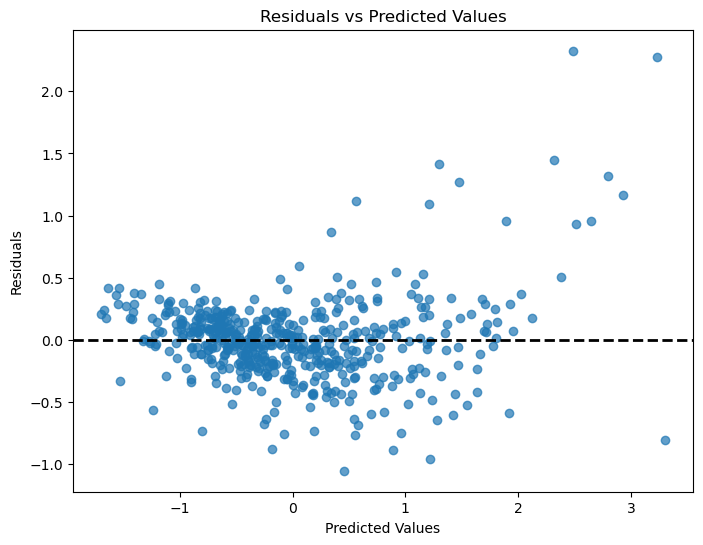

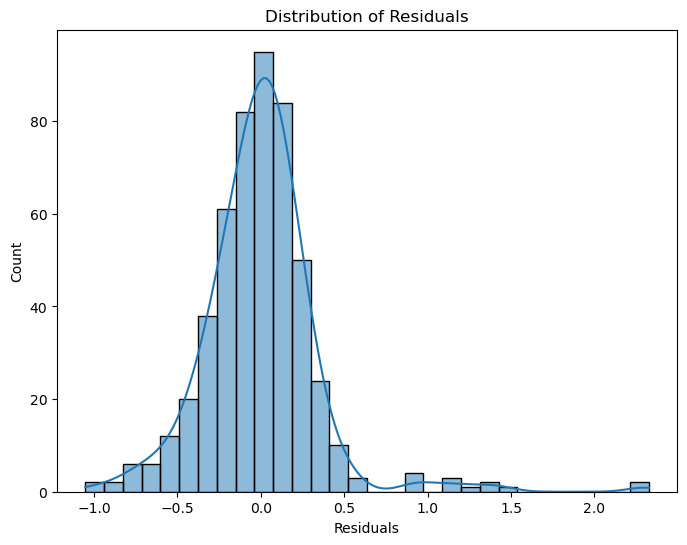

In [46]:
##lasso 
from sklearn import linear_model


model1 = linear_model.Lasso(alpha=0.02)
z=model1.fit(X_train, y_train)
y_pred = z.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print("MSE of lasso with 0.02 alpha:" ,mse)

model2 = linear_model.Lasso(alpha=0.06)
z=model2.fit(X_train, y_train)
y_pred = z.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print("MSE of lasso with 0.06 alpha:" ,mse)

model3 = linear_model.Lasso(alpha=0.1)
z=model3.fit(X_train, y_train)
y_pred = z.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print("MSE of lasso with 0.1 alpha:" ,mse)


###0.02 alpha produces the best result, so use alpha=0.02 to predict test set

model1 = linear_model.Lasso(alpha=0.02)
z=model1.fit(X_train, y_train)
y_pred = z.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("coef of lasso:",z.coef_)
print("intercept of lasso:",z.intercept_)
print("MSE of lasso with 0.02 alpha:" ,mse)


###visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()
import seaborn as sns

# Distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()



In [56]:
##Evaluate your model performance with the test data set.

##as seen above, linear regression produces the best mse for test set, and I also did some visualizations to show the Predictions vs Actual Values, and residuals.
